In [1]:
import sys
sys.path.append('/Users/apple/Documents/ML_Project/ML - 2.1/')
import numpy as np
import pandas as pd
from module.utils import *
from ngboost.learners import *
from tqdm.notebook import tqdm as tqdm
from sklearn.metrics.regression import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'

/Users/apple/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 西班牙数据

In [2]:
best_param = \
{'drop_time': 1.0, 
 'hour_num': 1.0, 
 'max_depth': 4.0, 
 'transform': 'ws*cos(wd)'} 

get_data(hour_num=1, transform='ws*cos(wd)', drop_time=True, scale=True)

Input space: Index(['ws*cos(wd)', 'ws*cos(wd)-1', 'wind_power-1'], dtype='object')
train index: [6426, 10427] train_len: 4000
test index: [14389, 15390] test_len: 1000


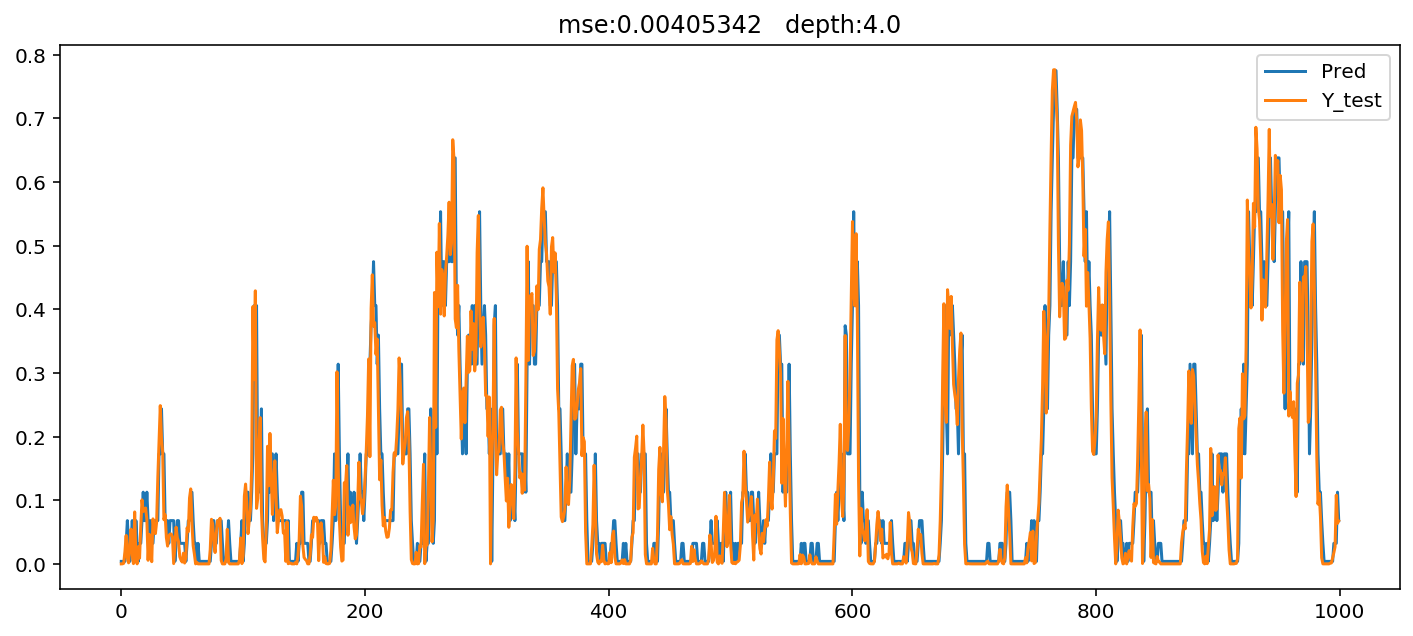

In [3]:
tree_model_plot1(best_param)

Dist=Normal

get_data(hour_num=1, transform='ws*cos(wd)', drop_time=True, scale=True)

Input space: Index(['ws*cos(wd)', 'ws*cos(wd)-1', 'wind_power-1'], dtype='object')
train index: [6426, 10427] train_len: 4000
test index: [14389, 15390] test_len: 1000
NGBRegressor(Base=DecisionTreeRegressor(criterion='mse', max_depth=4.0,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.CRPS'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_grad

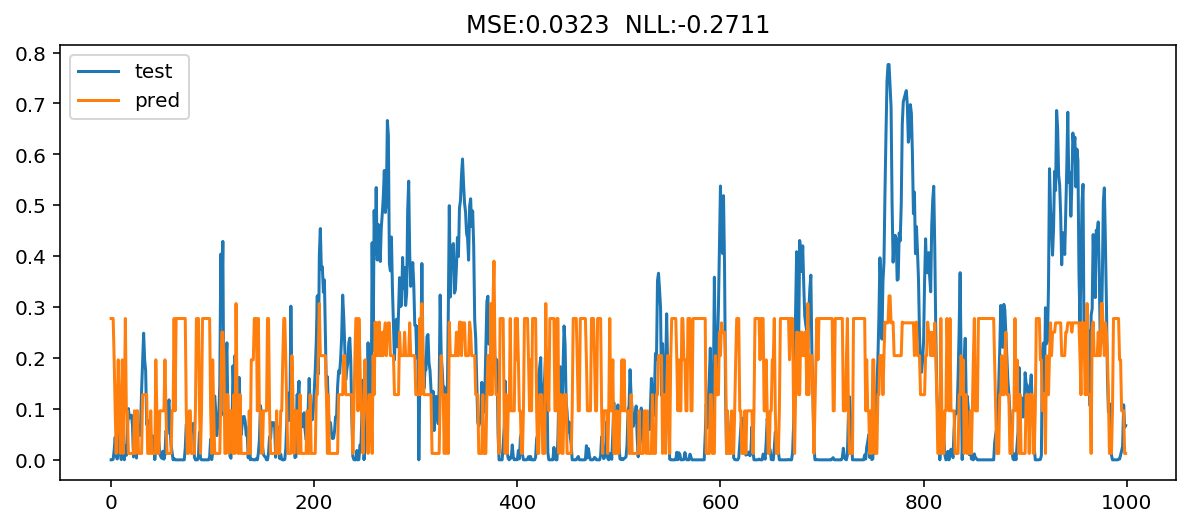

In [4]:
X_train, X_test, Y_train, Y_test, Y_scaler = \
get_data(hour_num=int(best_param['hour_num']),
         transform=best_param['transform'],
         drop_time=bool(best_param['drop_time']), 
         scale=True, return_y_scaler=True)
Tree =  DecisionTreeRegressor(max_depth=best_param['max_depth'])

model_test(Base=Tree, verbose_eval=100,
           n_estimators=500, learning_rate=0.01, 
           Score=CRPS, Dist=Normal,
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test)

Dist=LogNormal

In [4]:
X_train, X_test, Y_train, Y_test, Y_scaler = \
get_data(hour_num=int(best_param['hour_num']),
         transform=best_param['transform'],
         drop_time=bool(best_param['drop_time']), 
         scale=True, return_y_scaler=True)
Tree =  DecisionTreeRegressor(max_depth=best_param['max_depth'])

model_test(Base=Tree, verbose_eval=100,
           n_estimators=500, learning_rate=0.01, 
           Score=CRPS, Dist=LogNormal,
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test)

get_data(hour_num=1, transform='ws*cos(wd)', drop_time=True, scale=True)

Input space: Index(['ws*cos(wd)', 'ws*cos(wd)-1', 'wind_power-1'], dtype='object')
train index: [6426, 10427] train_len: 4000
test index: [14389, 15390] test_len: 1000
NGBRegressor(Base=DecisionTreeRegressor(criterion='mse', max_depth=4.0,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'),
             Dist=<class 'ngboost.distns.lognormal.LogNormal'>,
             Score=<class 'ngboost.scores.CRPS'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natura

KeyError: 'Time'

# 美国数据

get_data2(hour_num=0, transform='sin+cos', drop_time=True, drop_esle=False, scale=True)

Data: ['相近8个地点2012年数据', '20738-2012.csv'] 

Input space: Index(['wind_speed', 'air_temperature', 'surface_air_pressure', 'density',
       'sin(wd)', 'cos(wd)'],
      dtype='object')
train index: [3001, 7002] train_len: 4001
test index: [2000, 3001] test_len: 1001


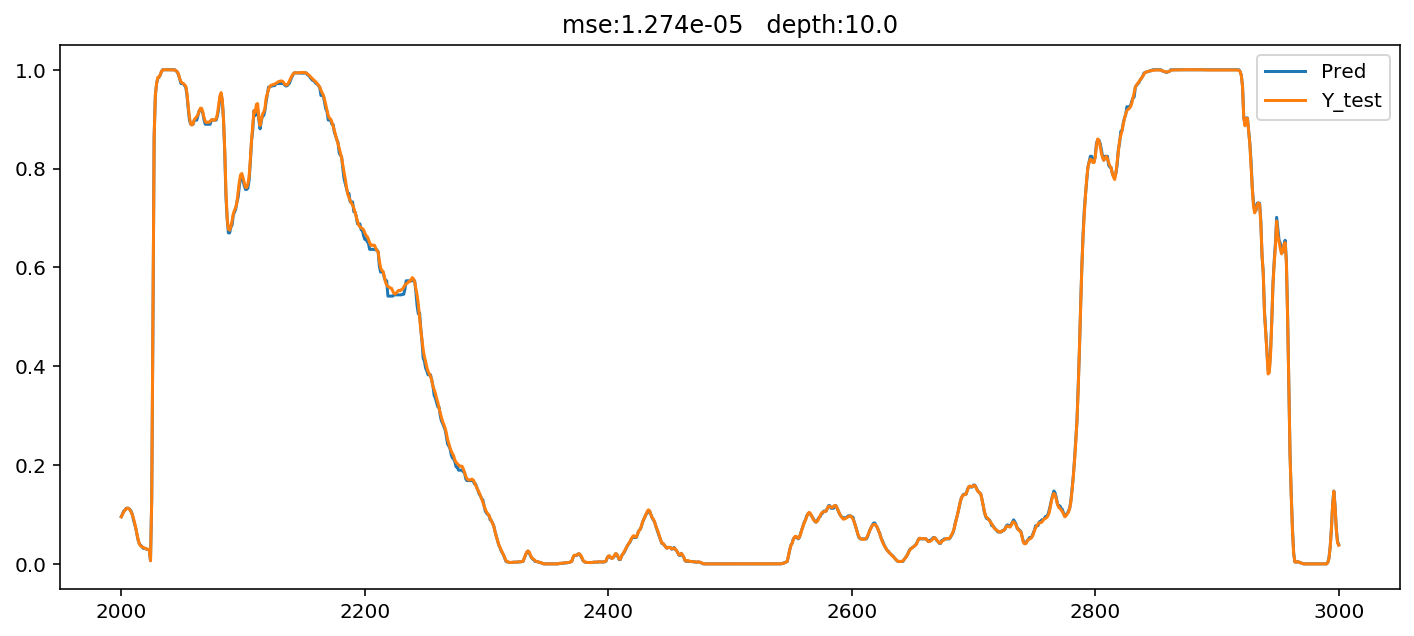

In [7]:
best_param =  {'drop_else': 0.0, 
               'drop_time': 1.0, 
               'hour_num': 0.0, 
               'max_depth': 10.0, 
               'mse': 2.5709866985355128e-05, 
               'transform': 'sin+cos'} 
tree_model_plot2(best_param, drop_minute=False)

get_data2(hour_num=0, transform='sin+cos', drop_time=True, drop_esle=False, scale=True)

Data: ['相近8个地点2012年数据', '20738-2012.csv'] 

Input space: Index(['wind_speed', 'air_temperature', 'surface_air_pressure', 'density',
       'sin(wd)', 'cos(wd)'],
      dtype='object')
train index: [3001, 7002] train_len: 4001
test index: [2000, 3001] test_len: 1001
NGBRegressor(Base=DecisionTreeRegressor(criterion='mse', max_depth=10.0,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=

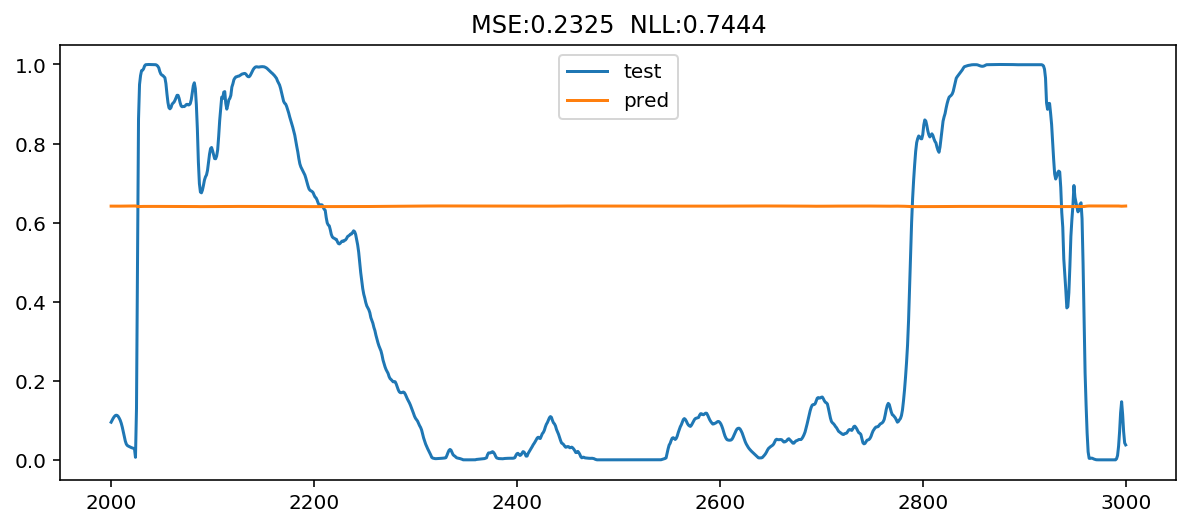

In [9]:
X_train, X_test, Y_train, Y_test, Y_scaler = \
get_data2(hour_num=int(best_param['hour_num']),
         transform=best_param['transform'],
         drop_time=bool(best_param['drop_time']), 
         drop_else=bool(best_param['drop_else']), 
         scale=True, return_y_scaler=True)
Tree =  DecisionTreeRegressor(max_depth=best_param['max_depth'])

model_test(Base=Tree, verbose_eval=100,
           n_estimators=500, learning_rate=0.01, Dist=Normal,
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test)

In [10]:
X_train, X_test, Y_train, Y_test, Y_scaler = \
get_data2(hour_num=int(best_param['hour_num']),
         transform=best_param['transform'],
         drop_time=bool(best_param['drop_time']), 
         drop_else=bool(best_param['drop_else']), 
         scale=True, return_y_scaler=True)
Tree =  DecisionTreeRegressor(max_depth=best_param['max_depth'])

model_test(Base=Tree, verbose_eval=100,
           n_estimators=500, learning_rate=0.01, Dist=LogNormal,
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test)

get_data2(hour_num=0, transform='sin+cos', drop_time=True, drop_esle=False, scale=True)

Data: ['相近8个地点2012年数据', '20738-2012.csv'] 

Input space: Index(['wind_speed', 'air_temperature', 'surface_air_pressure', 'density',
       'sin(wd)', 'cos(wd)'],
      dtype='object')
train index: [3001, 7002] train_len: 4001
test index: [2000, 3001] test_len: 1001


AssertionError: 